<h1>Iteration 1 : Plot T-SNE</h1>

In [13]:
import csv
import numpy as np
import pandas as pd
import sys
sys.path.append("../") 

import os
from module.data_processing.read_data import *
import json

ROOT_DIR = '/home/aonishchuk/'
DATA_DIR = os.path.join(ROOT_DIR, 'data')
IMAGES_DIR = os.path.join(ROOT_DIR, 'images')

illu_file = os.path.join(DATA_DIR, 'illu_rawnorm.csv')
genes_file = os.path.join(DATA_DIR, 'illu_genes.pkl')
landmarks_file = os.path.join(DATA_DIR, 'landmarks.txt')
kkochetov_model_params_file = os.path.join(DATA_DIR, 'archs.json')
best_genes_file = os.path.join(DATA_DIR, 'illu_dfs.pkl')

<h3>Read data</h3>

In [8]:
data = read_csv(illu_file, None)
best_genes = read_genes(best_genes_file)[:1000]

<h3>T-SNE</h3>

In [12]:
from sklearn.manifold import TSNE

def calculate_tsne(data):
    tsne_results = TSNE(n_components=2).fit_transform(data)
    return tsne_results

In [14]:
tsne = calculate_tsne(data[best_genes])

In [16]:
def plot_tsne_seaborn(tsne, target_column, title=None):
    df_subset = pd.DataFrame()
    df_subset['tsne-2d-one'] = tsne[:, 0]
    df_subset['tsne-2d-two'] = tsne[:, 1]

    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue=target_column,
        palette=sns.color_palette("hls", target_column.nunique()),
        data=df_subset,
        legend="full",
        alpha=0.3
    )

    if title is not None:
        image_name = os.path.join(IMAGES_DIR, '{}.png'.format(title))
        plt.savefig(image_name)

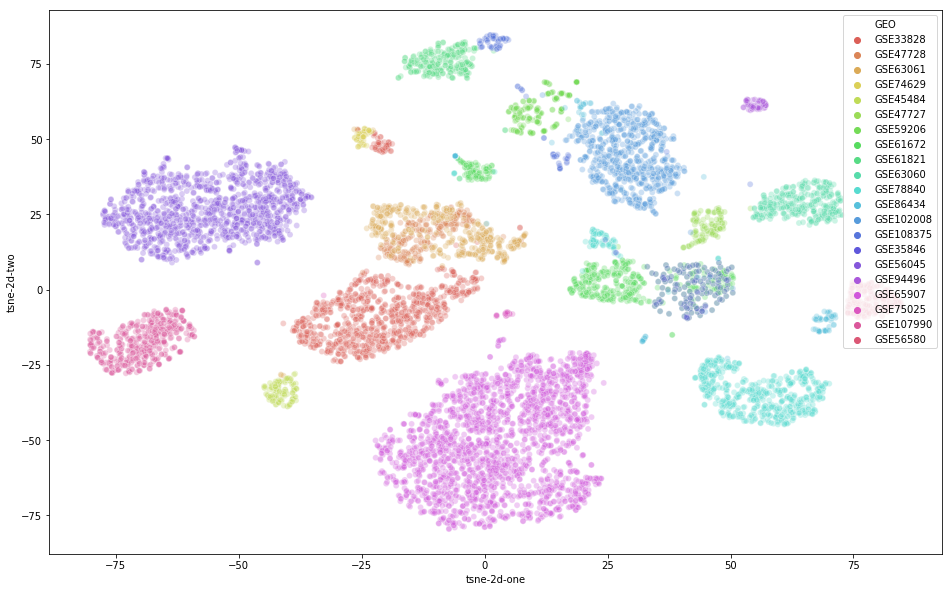

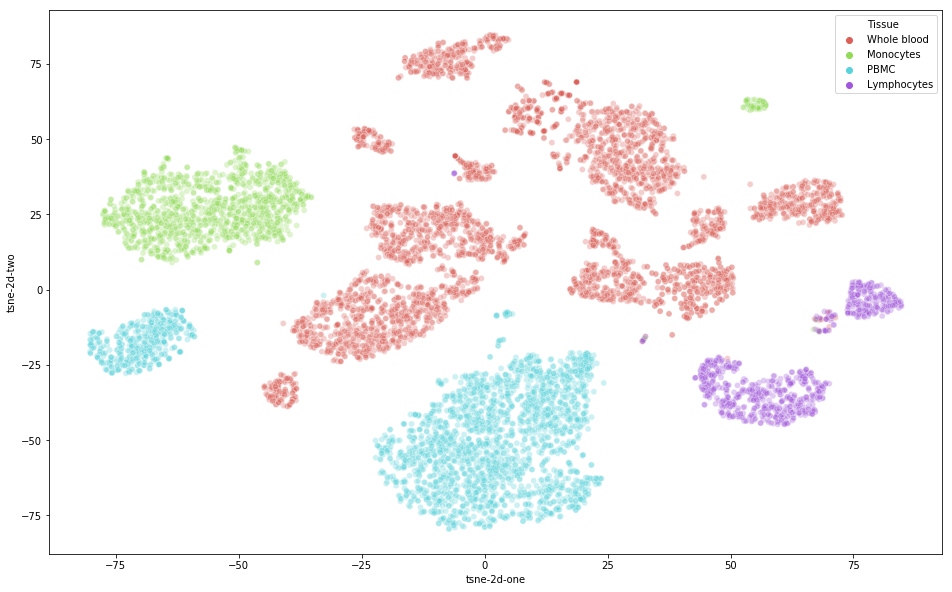

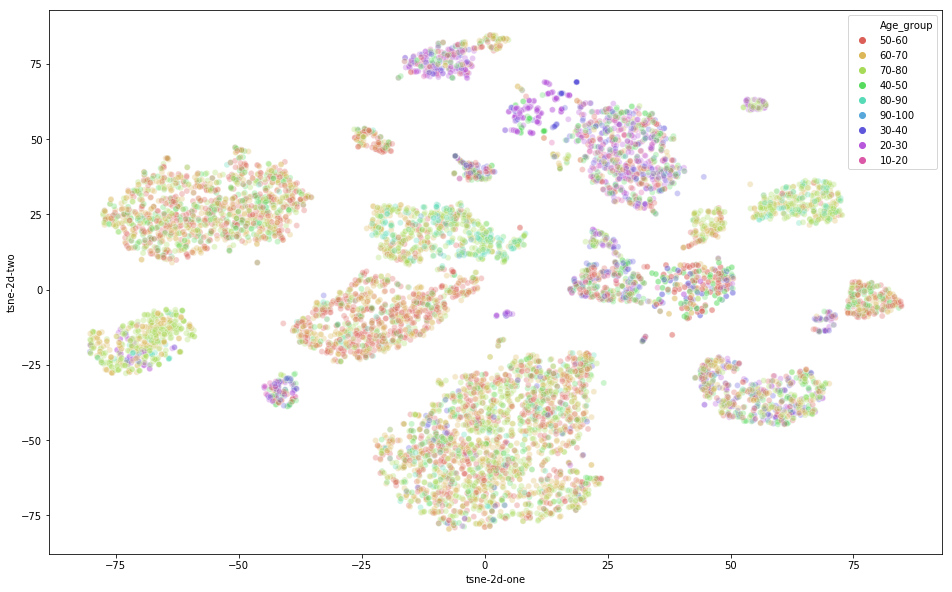

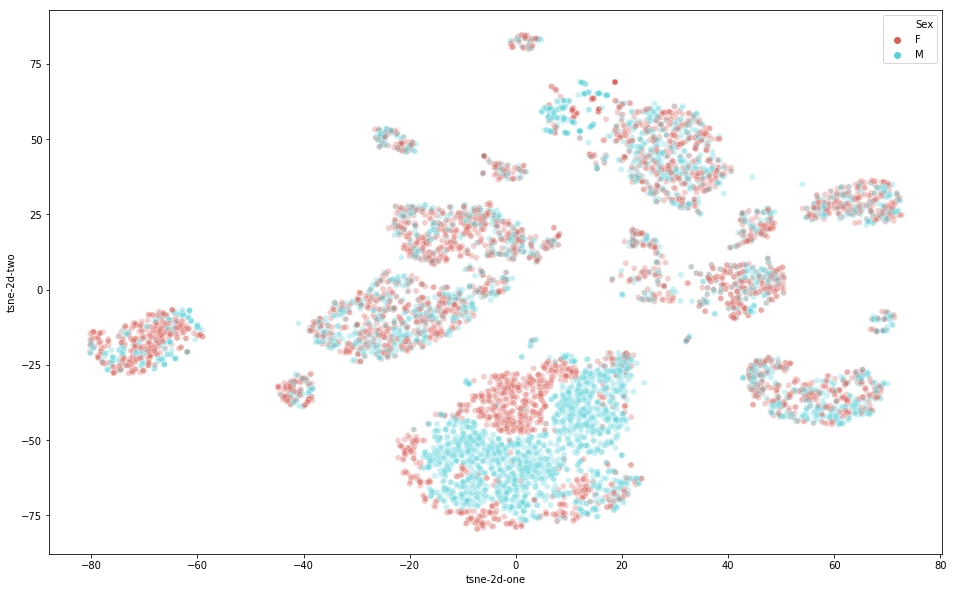

In [17]:
target_columns = ['GEO', 'Tissue', 'Age_group', 'Sex']
for column in target_columns:
    plot_tsne_seaborn(tsne, data[column], 'tsne_{}'.format(column.lower()))